<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
np_sales = np.array(sales)
np_sales_mean = np_sales.mean()
np_sales_var = np_sales.var()
np_sales_std = np_sales.std()
print('---- Using Library Functions for Descriptive Stat. ----')
print("""
Sales Mean: {:.2f}
Sales Var: {:.2f}
Sales STD: {:.2f}
""".format(np_sales_mean, np_sales_var, np_sales_std))

---- Using Library Functions for Descriptive Stat. ----

Sales Mean: 3052.71
Sales Var: 183761.06
Sales STD: 428.67



In [3]:
def mean(arr):
    if not isinstance(arr, (np.ndarray, np.generic)):
        raise ValueError('Incorrect data type passed, needs numpy array')
    return arr.sum() / arr.shape[0]

def variance(arr):
    if not isinstance(arr, (np.ndarray, np.generic)):
        raise ValueError('Incorrect data type passed, needs numpy array')
    return ((arr - mean(arr))**2).sum() / arr.shape[0]

def std(arr):
    if not isinstance(arr, (np.ndarray, np.generic)):
        raise ValueError('Incorrect data type passed, needs numpy array')
    return np.sqrt(variance(arr))

sales = np.array(sales)
print('--- Custom Functions for Descriptive Stat. ---')
print("""
Sales Mean: {:.2f}
Sales Var: {:.2f}
Sales STD: {:.2f}
""".format(mean(sales), variance(sales), std(sales)))

--- Custom Functions for Descriptive Stat. ---

Sales Mean: 3052.71
Sales Var: 183761.06
Sales STD: 428.67



## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use libray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93] 

sales_df = pd.DataFrame({'sales':sales, 'customers':customers})
sales_df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [5]:
sales_df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [6]:
sales_df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [7]:
std_sales = sales_df['sales'].std(ddof=0)
std_customers = sales_df['customers'].std(ddof=0)
sales_df.cov() / (std_sales*std_customers)

,sales,customers
sales,31.669118,1.123306
customers,1.123306,0.042979


In [8]:
std_sales = sales_df['sales'].std(ddof=1)
std_customers = sales_df['customers'].std(ddof=1)
sales_df.cov() / (std_sales*std_customers)

,sales,customers
sales,27.144959,0.962834
customers,0.962834,0.036839


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [9]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


### Select Numeric Columns

In [10]:
numeric_cols = ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'has_cabin_number', 'sex']
titanic_df = titanic_df[numeric_cols]
titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,sex
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1,female
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,male
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1,female
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,male
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1,female


### One-Hot encoding of categorical and dropping that column

In [11]:
titanic_df['is_male'] = titanic_df['sex'].map({'male':1, 'female':0}, na_action='ignore')
titanic_df = titanic_df.drop(labels='sex', axis=1)
titanic_df['is_male'].value_counts(dropna=False)

1.0    843
0.0    466
NaN      1
Name: is_male, dtype: int64

In [12]:
titanic_df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,is_male
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1,0.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,1.0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1,0.0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,1.0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1,0.0


### Descriptive Statistics

In [13]:
titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,is_male
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,1310.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,0.225191,0.644003
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,0.417867,0.478997
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000


### Check for NaN's

In [14]:
titanic_df.isnull().sum()

pclass              1
survived            1
age                 0
sibsp               1
parch               1
fare                2
has_cabin_number    0
is_male             1
dtype: int64

### Calcluate Covariance

In [15]:
titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,is_male
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992,0.050011
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406,-0.123090
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138,0.354202
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946,-0.054690
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316,-0.088362
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961,-4.600321
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613,-0.027508
is_male,0.050011,-0.123090,0.354202,-0.054690,-0.088362,-4.600321,-0.027508,0.229438


### Calculate Pearson's Correlation

In [16]:
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,is_male
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857,0.124617
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250,-0.528693
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887,0.057398
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064,-0.109609
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806,-0.213125
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253,-0.185523
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000,-0.137396
is_male,0.124617,-0.528693,0.057398,-0.109609,-0.213125,-0.185523,-0.137396,1.000000


### Obligatory HeatMap ;)

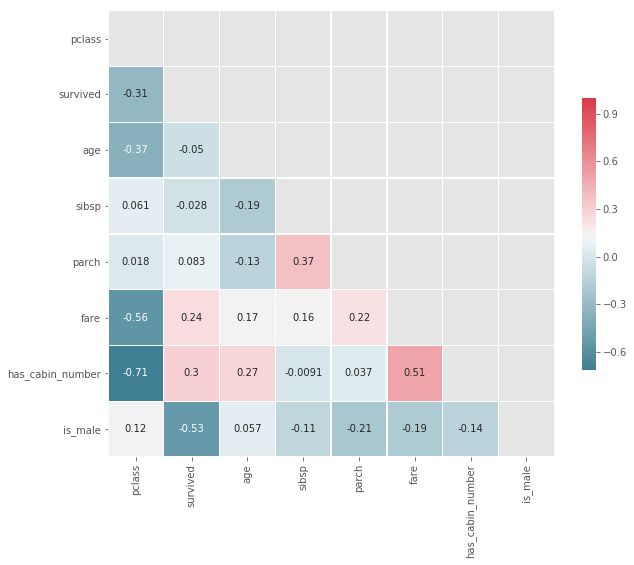

In [17]:
def correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson'):
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Taken from the seaborn example at:
    # http://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show()
    plt.close()

plt.style.use('ggplot')
correlation_heatmap(titanic_df)

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

x . y =  0
So, they are orthogonal to each other.


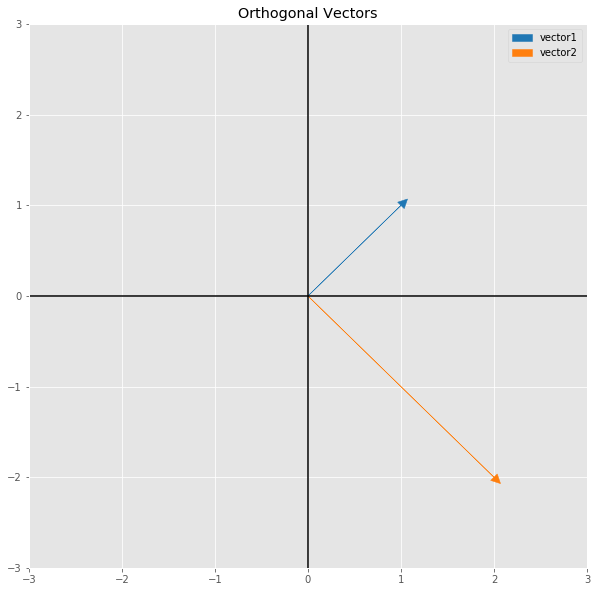

In [18]:
# Orthogonal vectors are perpendicular to each other
x = np.array([1,1])
y = np.array([2,-2])
print('x . y = ', np.dot(x,y))
print('So, they are orthogonal to each other.')


def plot_2dvectors(*vectors, xlim=[-1, 1], ylim=[-1, 1], title='2D - Vectors'):
    import matplotlib.colors as mcolors
    from random import randint
    colors = list(mcolors.TABLEAU_COLORS.values())
    colors_n = len(colors)
    plt.figure(figsize=(10, 10))
    arrows = []
    for idx, vector in enumerate(vectors):
        try:
            color = colors[idx]
        except:
            color = colors[randint(0, colors_n)]
        arrow = plt.arrow(0, 0, vector[0], vector[1], head_width=.1, head_length=.1, color=color, label='vector{}'.format(idx+1)) 
        arrows.append(arrow)
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.legend(handles=arrows, loc='upper right')
    plt.show()
    
plot_2dvectors(x, y, xlim=[-3, 3], ylim=[-3, 3], title='Orthogonal Vectors')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [19]:
# Orthogonal vectors are perpendicular to each other
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

def is_orthogonal(x, y):
    if round(np.dot(x, y)) == 0:
        return True
    else:
        return False

print('Vector a is: ', a)
print('Vector b is: ', b)
print('a . b = ', np.dot(a, b))
print('Are vectors a and b orthogonal ? ', is_orthogonal(a, b))

Vector a is:  [-5  3  7]
Vector b is:  [ 6 -8  2]
a . b =  -40
Are vectors a and b orthogonal ?  False


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [20]:
# Calculate using a numpy method

c = [2, -15, 6, 20]
c = np.array(c)

norm_sqr_c = c @ c
dot_product_c = c @ c
c_trans_c = (c @ c.reshape(-1, 1))[0]

print('||c||^2 = ', norm_sqr_c)
print('c . c = ', dot_product_c)
print('c^T * c = \n', c_trans_c)

||c||^2 =  665
c . c =  665
c^T * c = 
 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

For $d$, 

$\mathbb{R}^2$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

So, 

$
7\ \begin{bmatrix} 1 \\ 0 \end{bmatrix}\ +\ 12\ \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
$

Now for $e$,

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

So,

 $2\ \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}\ +\ 11\ \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}\ -8\ \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}\ =\ \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}$


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [21]:
f = [4, 12, 11, 9, 2]
f = np.array(f)
unit_vector_f = f / np.linalg.norm(f)
print('Unit Vector f is: \n', unit_vector_f)

Unit Vector f is: 
 [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

### Linearly Dependent Vectors

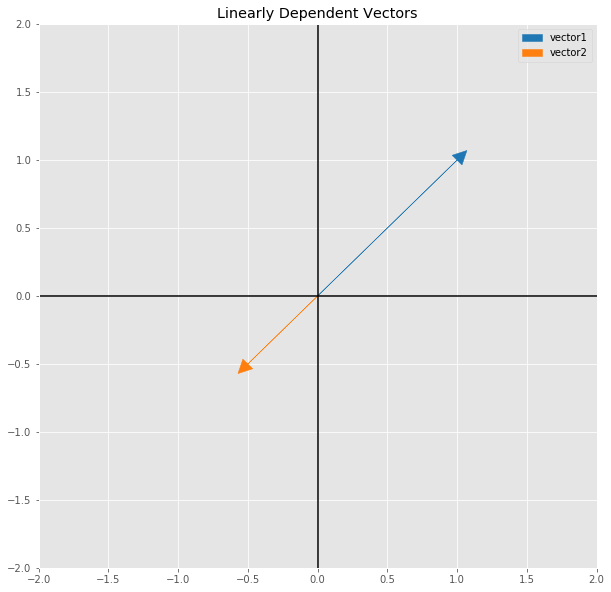

In [44]:
v =  np.array([.5, .5])
v1 = np.multiply(2, v)
v2 = np.multiply(-1, v)
plot_2dvectors(v1, v2, xlim=[-2, 2], ylim=[-2, 2], title='Linearly Dependent Vectors')

###  Linearly Independent Vectors

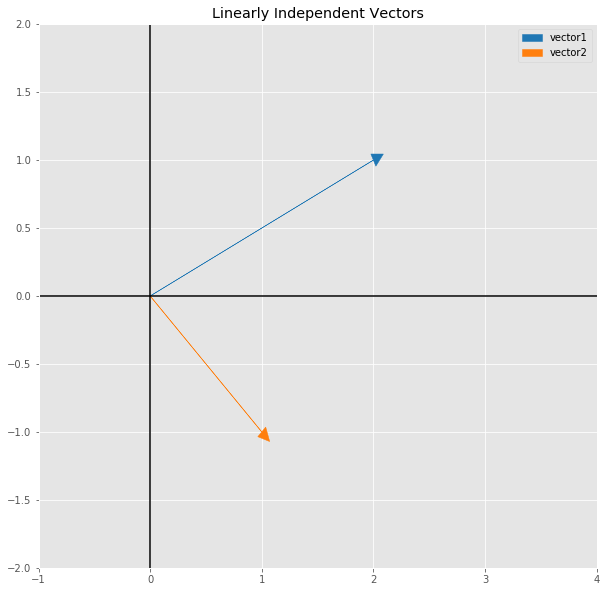

In [47]:
v1 = np.array([2, 1])
v2 = np.array([1, -1])
plot_2dvectors(v1, v2, xlim=[-1, 4], ylim=[-2, 2], title='Linearly Independent Vectors')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Since, $h$ is linear combination of $g$, $2 \cdot g = h$, is only spans $\mathbb{R}$. 

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Since, $l\ \neq\ am\ +\ bn$, where $a$ and $b$ are scalars, thus, we can say, linear combinations of $\{l, m, n\}$ spans $\mathbb{R}^3$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



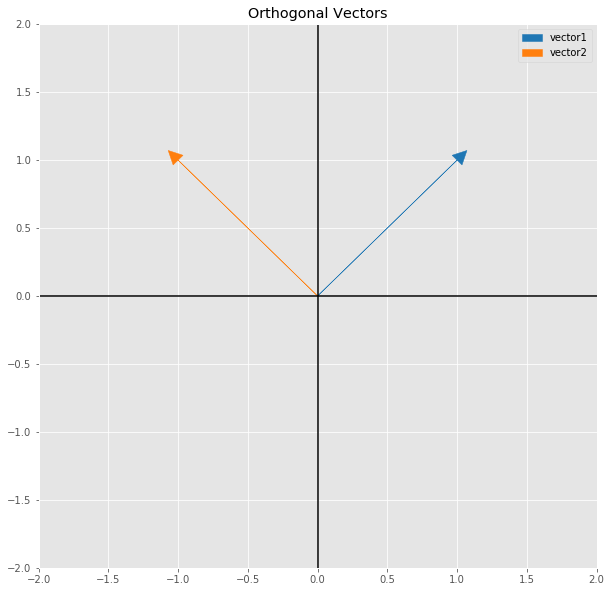

In [52]:
i_hat = np.array([1, 1])
j_hat = np.array([-1, 1])
plot_2dvectors(i_hat, j_hat, xlim=[-2, 2], ylim=[-2, 2], title='Orthogonal Vectors')

## 6.2 What does it mean to form a basis?

To form a basis for a vector space $V$, a set of vectors have to be have to be linearly independent, and span that vector sapce $V$.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Since no two rows or columns form a linear combination of last column, than rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the **dimension** of the vector space spanned by its columns, or simply put, it is number of pivots that appear in its Reduced-Row Echelon Form. 



# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

v =  [1 3]
w =  [-1  2]
projection of w onto v =  [0.5 1.5]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


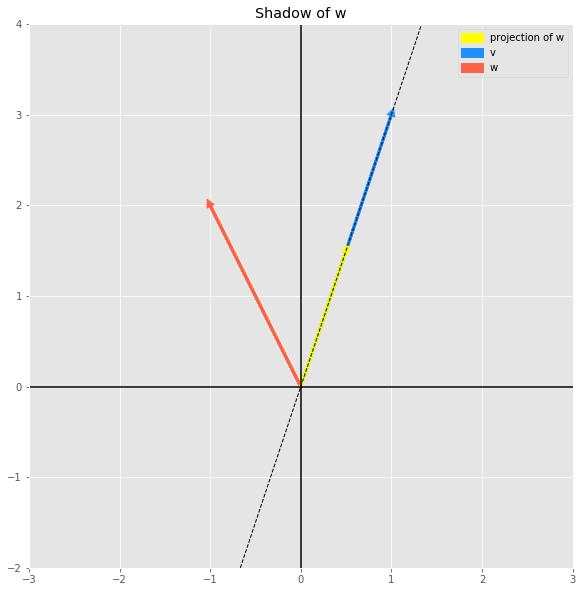

In [80]:
# Calculate the scalar projection "by hand"
def scalar_projection(u, v):
    return np.dot(u, v) / np.linalg.norm(v)

# Calculate the vector projection "by hand"
def projection_product(u, v):
    # scalar projection of u onto v
    projection = scalar_projection(u, v)
    # unit vector in the direction of v
    unit_vec_v = v / np.linalg.norm(v)
    # return the projection product
    return projection * unit_vec_v

# Original Vector
v = np.array([1, 3]) 
w = np.array([-1, 2])

proj_w = projection_product(w, v)
print('v = ', v)
print('w = ', w)
print('projection of w onto v = ', proj_w)

# Set figure
plt.figure(figsize=(10, 10))

# Set axis bounds
plt.xlim(-3,3)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = v[1]*x_vals

# Plot vectors
plt.plot(x_vals, y_vals, '--', color='k', linewidth=1)
arrow2 = plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='dodgerblue', label='v')
arrow3 = plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='tomato', label='w')
arrow1 = plt.arrow(0, 0, proj_w[0], proj_w[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow', label='projection of w')

# Draw lines
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Add legend
plt.legend(handles=[arrow1, arrow2, arrow3], loc='upper right')

# Set title
plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

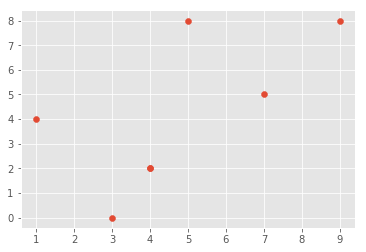

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()